# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [26]:
atp_data = pd.read_csv("atp_matches_2016.csv", header=0)
atp_data['tourney_date'] = pd.to_datetime(atp_data['tourney_date'], format='%Y%m%d')
atp_data = atp_data.drop(columns=['winner_name', 'loser_name', "match_num"])
atp_data[['winner_id', 'loser_id', 'tourney_date', 'draw_size', "best_of"]] = atp_data[[
    'winner_id', 'loser_id', 'tourney_date', 'draw_size', "best_of"]].astype('category')
atp_data[atp_data.select_dtypes('object').columns] = atp_data.select_dtypes('object').astype('category')
atp_data

,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_seed,winner_entry,winner_hand,winner_ht,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,Brisbane,Hard,32.00,A,2016-01-04,105683.00,4.00,NaN,R,196.00,...,1.00,7.00,3.00,61.00,34.00,25.00,14.00,10.00,3.00,5.00
1,Brisbane,Hard,32.00,A,2016-01-04,103819.00,1.00,NaN,R,185.00,...,1.00,2.00,4.00,55.00,31.00,18.00,9.00,8.00,2.00,6.00
2,Brisbane,Hard,32.00,A,2016-01-04,105683.00,4.00,NaN,R,196.00,...,4.00,10.00,3.00,84.00,54.00,41.00,16.00,12.00,2.00,2.00
3,Brisbane,Hard,32.00,A,2016-01-04,103819.00,1.00,NaN,R,185.00,...,1.00,8.00,2.00,104.00,62.00,46.00,21.00,16.00,8.00,11.00
4,Brisbane,Hard,32.00,A,2016-01-04,106233.00,8.00,NaN,R,NaN,...,2.00,11.00,2.00,98.00,52.00,41.00,27.00,15.00,7.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,Davis Cup WG PO: KAZ vs RUS,Hard,4.00,D,2016-09-16,105723.00,NaN,NaN,R,185.00,...,1.00,2.00,2.00,87.00,60.00,34.00,8.00,11.00,7.00,13.00
3000,Davis Cup WG PO: SUI vs UZB,Clay,4.00,D,2016-09-16,104797.00,NaN,NaN,R,188.00,...,1.00,4.00,3.00,88.00,53.00,35.00,14.00,13.00,4.00,8.00
3001,Davis Cup WG PO: SUI vs UZB,Clay,4.00,D,2016-09-16,105967.00,NaN,NaN,R,NaN,...,3.00,3.00,1.00,107.00,73.00,36.00,18.00,12.00,10.00,16.00
3002,Davis Cup WG PO: SUI vs UZB,Clay,4.00,D,2016-09-16,104797.00,NaN,NaN,R,188.00,...,8.00,3.00,6.00,169.00,103.00,70.00,34.00,24.00,2.00,7.00


In [27]:
atp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tourney_name        2941 non-null   category
 1   surface             2941 non-null   category
 2   draw_size           2941 non-null   category
 3   tourney_level       2941 non-null   category
 4   tourney_date        2941 non-null   category
 5   winner_id           2941 non-null   category
 6   winner_seed         1359 non-null   float64 
 7   winner_entry        300 non-null    category
 8   winner_hand         2939 non-null   category
 9   winner_ht           2179 non-null   float64 
 10  winner_ioc          2941 non-null   category
 11  winner_age          2935 non-null   float64 
 12  winner_rank         2925 non-null   float64 
 13  winner_rank_points  2925 non-null   float64 
 14  loser_id            2941 non-null   category
 15  loser_seed          714 non-null    fl

In [28]:
pd.options.display.float_format = '{:.2f}'.format
atp_data.describe()

,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_seed,loser_ht,loser_age,loser_rank,loser_rank_points,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,1359.00,2179.00,2935.00,2925.00,2925.00,714.00,2001.00,2935.00,2895.00,2895.00,...,2915.00,2915.00,2915.00,2915.00,2915.00,2915.00,2915.00,2915.00,2915.00,2915.00
mean,7.48,186.87,27.96,76.48,1978.59,8.94,186.46,27.76,117.35,1087.41,...,5.08,5.38,3.51,83.34,49.83,33.42,15.52,12.64,4.91,8.81
std,6.65,7.93,4.21,133.81,2764.25,7.42,7.42,4.41,193.56,1313.40,...,4.16,5.06,2.62,30.38,19.83,14.88,7.44,4.38,3.31,4.26
min,1.00,163.00,17.19,1.00,1.00,1.00,163.00,17.19,1.00,1.00,...,0.00,0.00,0.00,12.00,7.00,5.00,0.00,2.00,0.00,0.00
25%,3.00,183.00,25.27,17.00,679.00,4.00,183.00,24.96,35.00,527.50,...,2.00,2.00,2.00,61.00,35.00,23.00,10.00,9.00,2.00,6.00
50%,6.00,188.00,28.25,41.00,1032.00,7.00,185.00,27.91,65.00,762.00,...,4.00,4.00,3.00,78.00,46.00,31.00,14.00,12.00,4.00,8.00
75%,9.50,190.00,30.89,82.00,1970.00,12.00,190.00,31.00,113.50,1191.00,...,7.00,7.00,5.00,100.00,61.00,42.00,20.00,15.00,7.00,11.00
max,33.00,208.00,37.85,1774.00,16950.00,33.00,208.00,37.85,2147.00,16950.00,...,25.00,56.00,19.00,246.00,168.00,136.00,55.00,38.00,25.00,30.00


In [29]:
atp_data.drop_duplicates()
atp_data.head(15)

,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_seed,winner_entry,winner_hand,winner_ht,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,Brisbane,Hard,32.00,A,2016-01-04,105683.00,4.00,NaN,R,196.00,...,1.00,7.00,3.00,61.00,34.00,25.00,14.00,10.00,3.00,5.00
1,Brisbane,Hard,32.00,A,2016-01-04,103819.00,1.00,NaN,R,185.00,...,1.00,2.00,4.00,55.00,31.00,18.00,9.00,8.00,2.00,6.00
2,Brisbane,Hard,32.00,A,2016-01-04,105683.00,4.00,NaN,R,196.00,...,4.00,10.00,3.00,84.00,54.00,41.00,16.00,12.00,2.00,2.00
3,Brisbane,Hard,32.00,A,2016-01-04,103819.00,1.00,NaN,R,185.00,...,1.00,8.00,2.00,104.00,62.00,46.00,21.00,16.00,8.00,11.00
4,Brisbane,Hard,32.00,A,2016-01-04,106233.00,8.00,NaN,R,NaN,...,2.00,11.00,2.00,98.00,52.00,41.00,27.00,15.00,7.00,8.00
5,Brisbane,Hard,32.00,A,2016-01-04,105683.00,4.00,NaN,R,196.00,...,1.00,6.00,4.00,73.00,43.00,33.00,9.00,10.00,5.00,8.00
6,Brisbane,Hard,32.00,A,2016-01-04,106071.00,7.00,NaN,R,193.00,...,11.00,5.00,3.00,84.00,52.00,35.00,15.00,12.00,7.00,10.00
7,Brisbane,Hard,32.00,A,2016-01-04,103819.00,1.00,NaN,R,185.00,...,1.00,2.00,4.00,46.00,27.00,15.00,6.00,8.00,1.00,6.00
8,Brisbane,Hard,32.00,A,2016-01-04,105777.00,NaN,NaN,R,188.00,...,7.00,9.00,1.00,120.00,76.00,51.00,23.00,16.00,6.00,9.00
9,Brisbane,Hard,32.00,A,2016-01-04,105227.00,3.00,NaN,R,198.00,...,6.00,5.00,2.00,79.00,50.00,36.00,15.00,12.00,6.00,9.00


In [30]:
encoded_columns = ["surface", "draw_size", "tourney_level", 
                   "winner_entry", "loser_entry", "winner_hand", "loser_hand", "best_of", "round"]

atp_data_encoded = pd.get_dummies(atp_data, columns=encoded_columns, drop_first=True)
atp_data_encoded


,tourney_name,tourney_date,winner_id,winner_seed,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,...,loser_hand_U,best_of_5.0,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,Brisbane,2016-01-04,105683.00,4.00,196.00,CAN,25.02,14.00,2170.00,103819.00,...,False,False,True,False,False,False,False,False,False,False
1,Brisbane,2016-01-04,103819.00,1.00,185.00,SUI,34.41,3.00,8265.00,106233.00,...,False,False,False,False,False,False,False,False,False,True
2,Brisbane,2016-01-04,105683.00,4.00,196.00,CAN,25.02,14.00,2170.00,106071.00,...,False,False,False,False,False,False,False,False,False,True
3,Brisbane,2016-01-04,103819.00,1.00,185.00,SUI,34.41,3.00,8265.00,105777.00,...,False,False,False,True,False,False,False,False,False,False
4,Brisbane,2016-01-04,106233.00,8.00,NaN,AUT,22.34,20.00,1600.00,105227.00,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,Davis Cup WG PO: KAZ vs RUS,2016-09-16,105723.00,NaN,185.00,RUS,25.56,47.00,998.00,105062.00,...,False,True,False,False,False,False,False,False,True,False
3000,Davis Cup WG PO: SUI vs UZB,2016-09-16,104797.00,NaN,188.00,UZB,30.02,113.00,550.00,134472.00,...,True,True,False,False,False,False,False,False,True,False
3001,Davis Cup WG PO: SUI vs UZB,2016-09-16,105967.00,NaN,NaN,SUI,24.45,138.00,433.00,122109.00,...,True,False,False,False,False,False,False,False,True,False
3002,Davis Cup WG PO: SUI vs UZB,2016-09-16,104797.00,NaN,188.00,UZB,30.02,113.00,550.00,105967.00,...,False,True,False,False,False,False,False,False,True,False


Ways the data was cleaned/corrected:
* Changed "tourney_date" to data-time format
* Dropped "_name" columns due to redundant information. Player names can be determine using an Index for IDs
* Dropped "match_num" column due to unnecessary information
* Changed discrete number columns to categorical, mainly IDs and Dates, along with "draw_size" and "best_of", since the latter two columns are bound to a small selection of values.
* Changed object columns to categorical (no need for object columns)
* Dropped duplicate rows (62) -- duplicate rows in this data suggest repeats, as each row is specific to one match. There are plenty of duplicates per column, but that is expected with each variable.
* There are a lot of NaN values, but that is also expected for most columns, therefor all NaNs were left alone.
* Encoding many of these categorical variables would make the data very complex, so only select columns (those that had fewer levels) were encoded.

Some Answered Questions: 
* This data is very much dependent on knowledge of the atp and the way match data is recorded, as well as trends or expectations for each variable.
* Some columns are expected to exhibit some class imbalance, such as the "_hand" columns, as right handed players are much more common than left handed players.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [83]:
import matplotlib.pyplot as plt

data = {
    "Product": ["A", "B", "C", "D", "E"],
    "2008": [390.0, 350.0, np.nan, np.nan, np.nan],
    "2009": [420.0, 400.0, np.nan, np.nan, np.nan],
    "2010": [430.0, 410.0, 100.0, np.nan, np.nan],
    "2011": [380.0, 370.0, 180.0, 250.0, np.nan],
    "2012": [300.0, 290.0, 200.0, 260.0, np.nan],
    "2013": [260.0, 250.0, 230.0, 220.0, 100.0],
    "2014": [250.0, 240.0, 180.0, 220.0, 210.0]
}
data = pd.DataFrame(data)


Text(0.5, 1.0, 'Average Retail Product Price per Year')

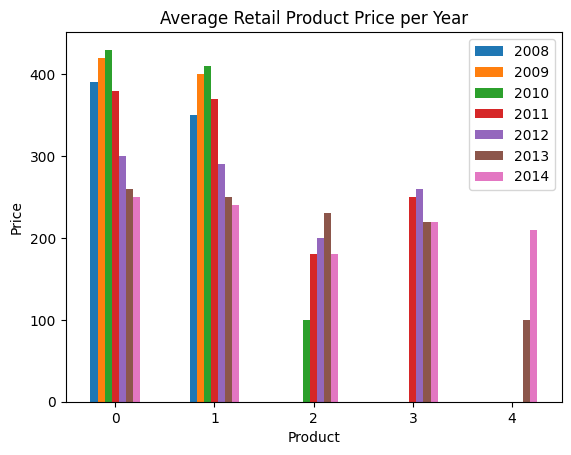

In [85]:
ax = data.plot(kind="bar", ylabel="Price", xlabel="Product", rot=0)
ax.legend()
ax.set_title("Average Retail Product Price per Year")